# How to Select a Multivariate Distribution

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/StatMixedML/XGBoostLSS/blob/master/docs/examples/How_To_Select_A_Multivariate_Distribution.ipynb)

In this example we will show how to select a distribution for a multivariate target variable. We use a simulated dataset.

# Imports

In [1]:
from xgboostlss.distributions.MVN import * 
from xgboostlss.distributions.MVT import *
from xgboostlss.distributions.MVN_LoRa import *

from xgboostlss.distributions.multivariate_distribution_utils import Multivariate_DistributionClass
from xgboostlss.datasets.data_loader import load_simulated_multivariate_gaussian_data
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Data

In [2]:
# Sample only 10% for plotting reasons
data = load_simulated_multivariate_gaussian_data().sample(frac=0.1, random_state=123).reset_index(drop=True).copy()

X, y = data["x"], data.filter(regex="y").values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Select Distribution

In the following, we specify a list of candidate distributions. The function `dist_select` returns the negative log-likelihood of each distribution. The distribution with the lowest negative log-likelihood is selected. The function also plots the density of the target variable and the fitted density, using the best suitable distribution among the specified ones.

It is important to note that the list of candidate distributions should be chosen to be suitable for the target variable at hand. For example, if the target variable is a count variable, then the list of candidate distributions should include the Poisson and Negative Binomial. Similarly, if the target variable is on the positive real scale, then the list of continuous candidate distributions should be chosen accordingly.

Fitting of candidate distributions completed: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.74it/s]


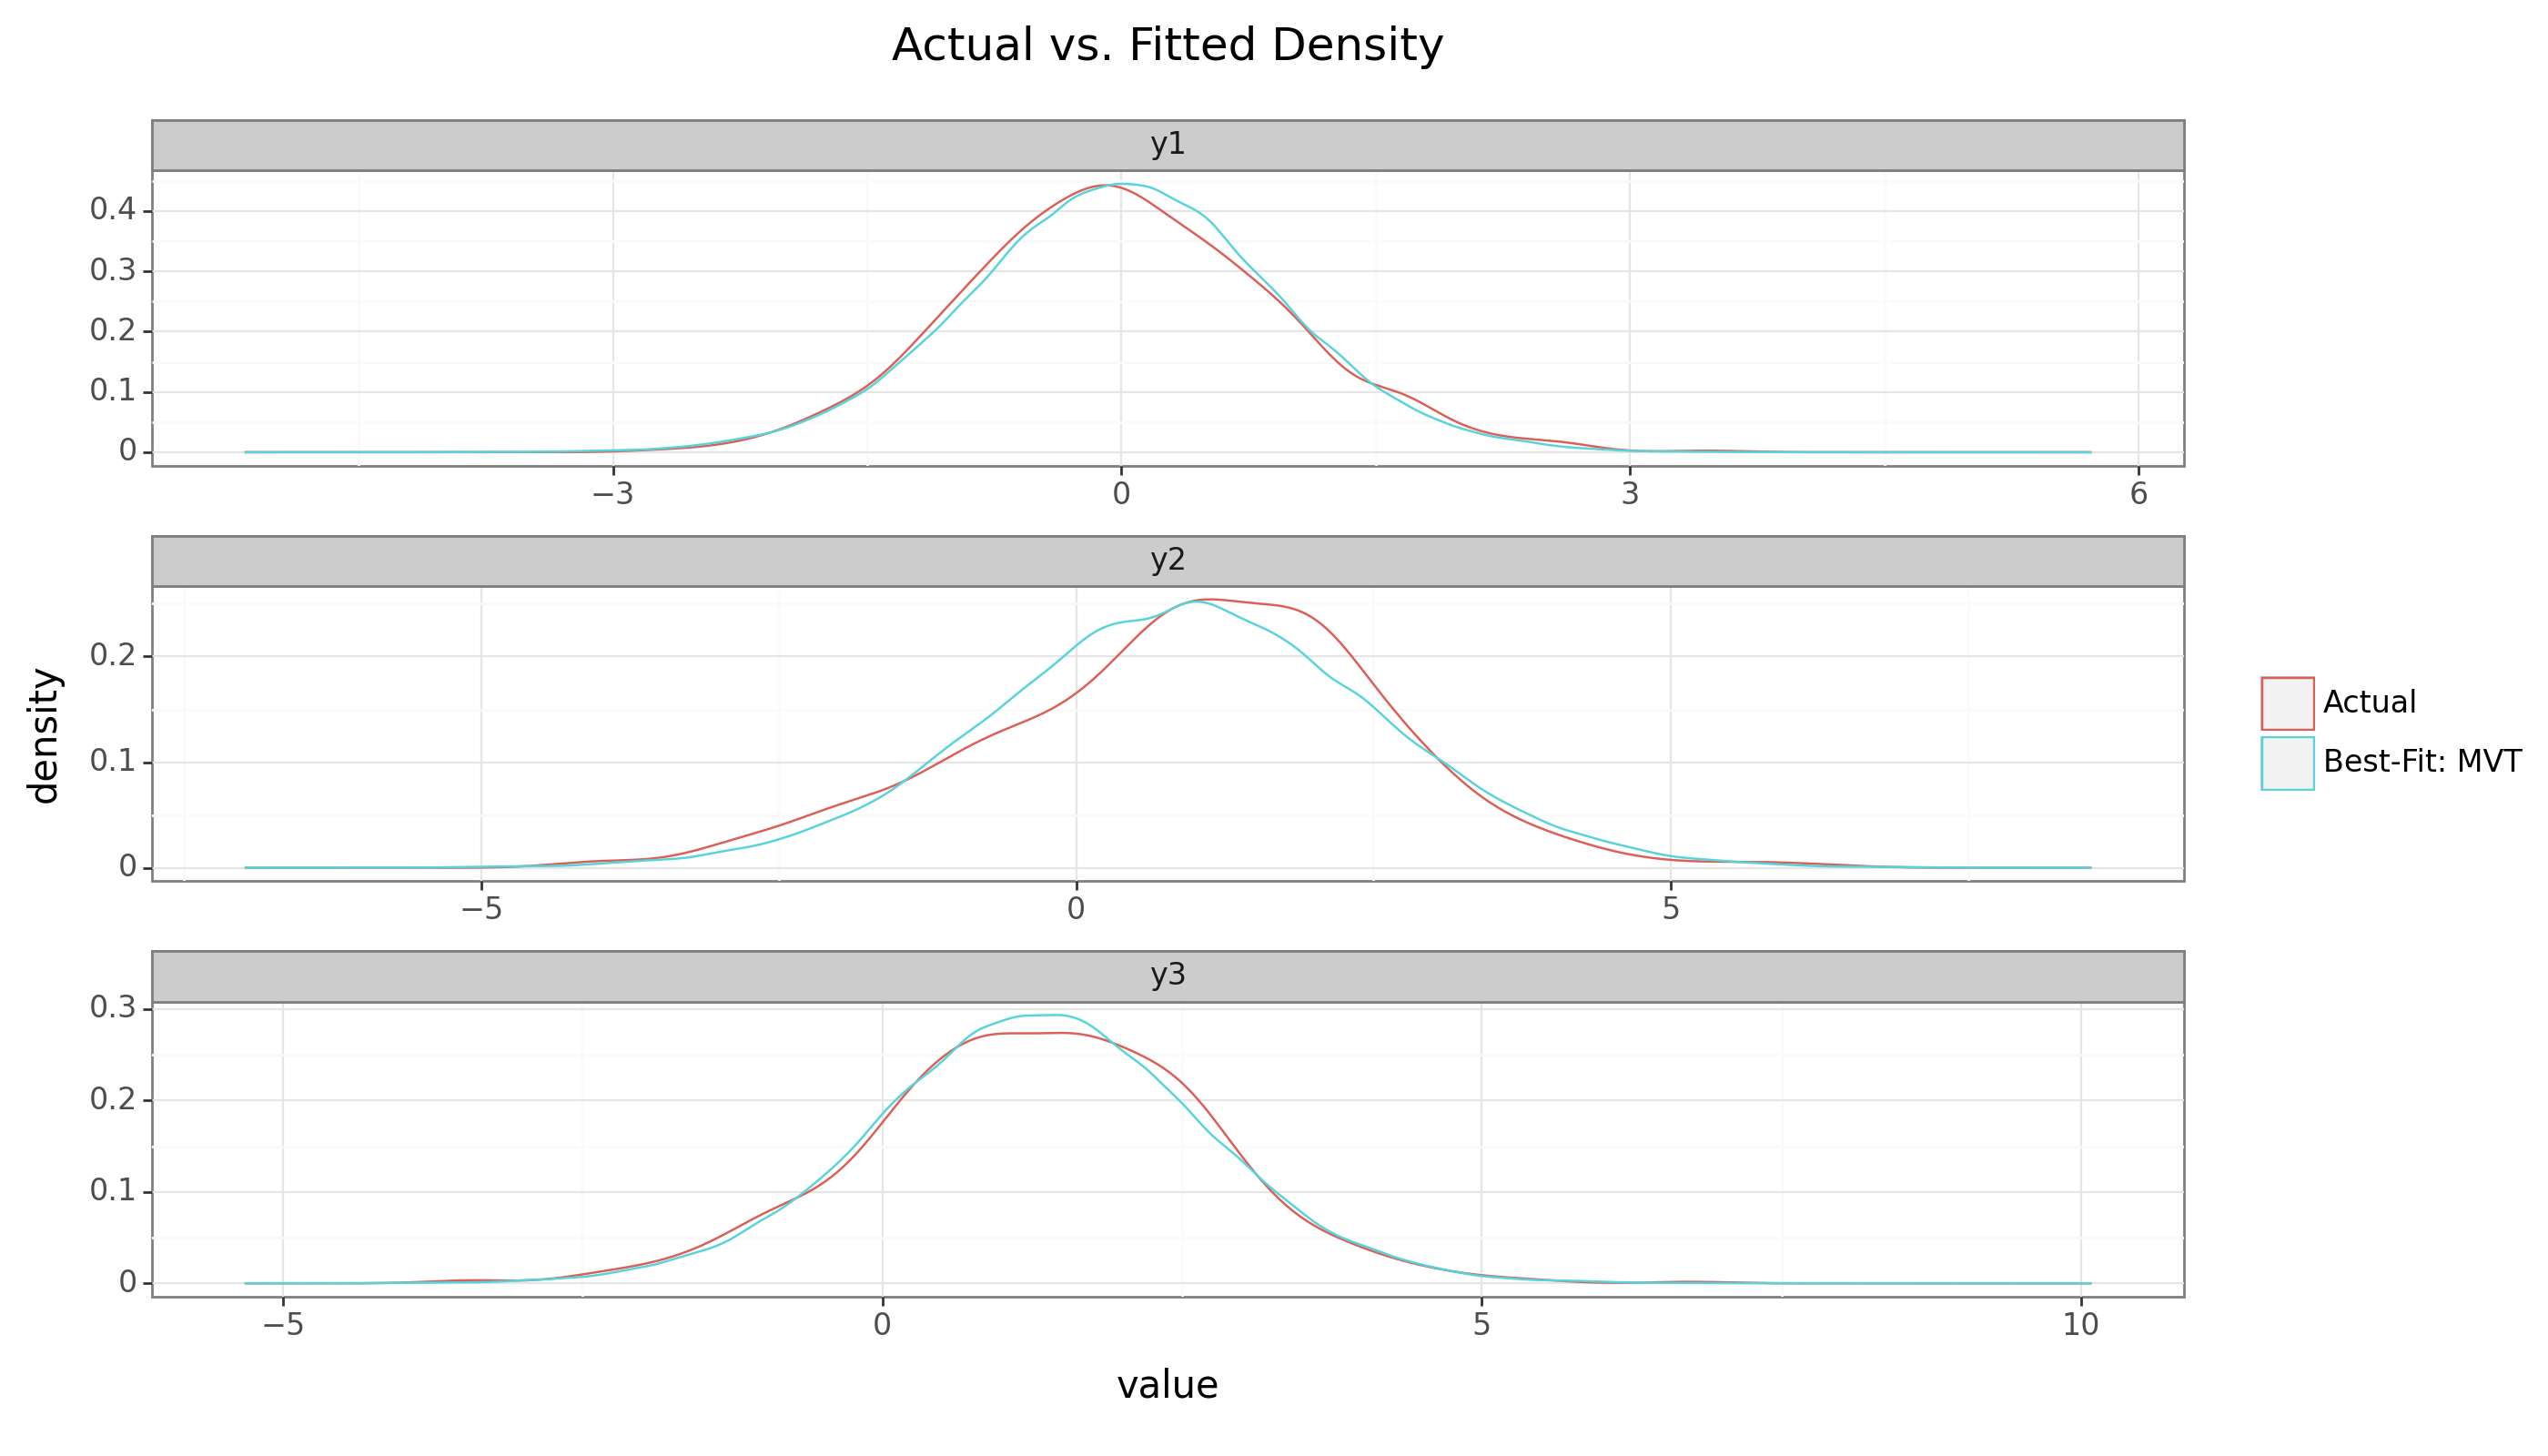

,nll,distribution
rank,,
1,3270.229857,MVT
2,3272.673684,MVN_LoRa(rank=2)
3,3272.673684,MVN


In [5]:
candidate_distributions = [MVN(D=3), MVT(D=3), MVN_LoRa(D=3, rank=2)] 

dist_nll = Multivariate_DistributionClass().dist_select(target=y_train, candidate_distributions=candidate_distributions, max_iter=50, n_samples=100, plot=True, ncol=1, figure_size=(14, 8))
dist_nll